In [4]:
import nltk
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model  import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [5]:
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
porter = PorterStemmer()

def stem(sentence):
    token_words =  word_tokenize(sentence.lower())
    stem_sentence=[porter.stem(word) for word in token_words]
    return  " ".join(stem_sentence)

In [6]:
ca = pd.read_csv('CA3.csv')
us = pd.read_csv('US3.csv')
high_df=ca[['text_no_sw']]
high_df['target']=1
low_df=us[['text_no_sw']]
low_df['target']=0
df=pd.concat([high_df,low_df])

sg = pd.read_csv('SG3.csv')
ph = pd.read_csv('PH3.csv')
high_df2=sg[['text_no_sw']]
high_df2['target']=1
low_df2=ph[['text_no_sw']]
low_df2['target']=0

df2=pd.concat([high_df2,low_df2])

nz = pd.read_csv('NZ3.csv') #1
ng = pd.read_csv('NG3.csv') #0
high_df3=nz[['text_no_sw']]
high_df3['target']=1
low_df3=ng[['text_no_sw']]
low_df3['target']=0

df3=pd.concat([high_df3,low_df3])

ie = pd.read_csv('IE3.csv') #1
bd = pd.read_csv('BD3.csv') #0
high_df6=ie[['text_no_sw']]
high_df6['target']=1
low_df6=bd[['text_no_sw']]
low_df6['target']=0

df6=pd.concat([high_df6,low_df6])



/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_3936/1888283773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df['target']=1
/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_3936/1888283773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df['target']=0
/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_3936/1888283773.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [7]:
df7=pd.concat([df,df2,df3,df6])
print(len(df7))

texts7=list(df7.text_no_sw)
texts7 = [text.replace("<br />"," ") for text in texts7]
texts7 = [re.sub(r"\b[a-zA-Z]\b", "", text) for text in texts7]
level7=df7.target

X_dev7,X_test7,y_dev7,y_test7=train_test_split(texts7,level7,
                                          test_size=0.2,random_state=42)

X_dev7=[stem(dev) for dev in X_dev7]
X_test7=[stem(test) for test in X_test7]
#for i in range(len(X_dev7)):
#    X_dev7[i] = stem(X_dev7[i])

#for i in range(len(X_test7)):
#    X_test7[i] = stem(X_test7[i])
    


408439


In [8]:
vector = TfidfVectorizer()
vector7=vector.fit(X_dev7)    


In [9]:
dev_X7 = vector7.transform(X_dev7)
test_X7 =  vector7.transform(X_test7)

## Logistic Regression

In [10]:
lr7 = LogisticRegressionCV().fit(dev_X7,y_dev7)
#scores_lr=cross_val_score(lr,dev_X,y_dev,cv=3)
#print("Auucuracy score on development data:",scores_lr.mean())
print("Auucuracy score on test data:",lr7.score(test_X7,y_test7))
y_hat_lr7 = lr7.predict(test_X7)

cm  = metrics.confusion_matrix(y_test7,y_hat_lr7)
print(cm)
print(classification_report(y_test7,y_hat_lr7, digits=4))

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Auucuracy score on test data: 0.9376162961512094
[[37086  2559]
 [ 2537 39506]]
              precision    recall  f1-score   support

           0     0.9360    0.9355    0.9357     39645
           1     0.9392    0.9397    0.9394     42043

    accuracy                         0.9376     81688
   macro avg     0.9376    0.9376    0.9376     81688
weighted avg     0.9376    0.9376    0.9376     81688



/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


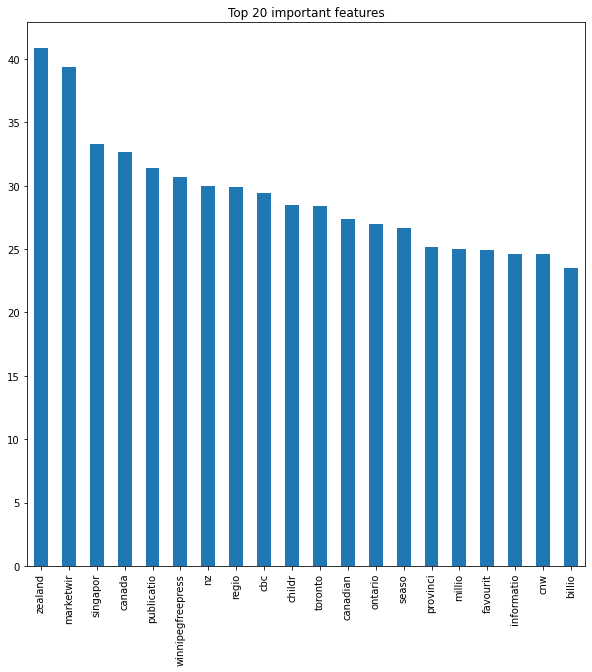

In [12]:
import numpy as np
feat_importances = pd.Series(lr7.coef_[0], index=vector7.get_feature_names())
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

## Random Forest

In [13]:
rf7 = RandomForestClassifier().fit(dev_X7,y_dev7)
#scores_rf=cross_val_score(rf,dev_X,y_dev,cv=3)
#print("Auucuracy score on development data:",scores_rf.mean())
print("Auucuracy score on test data:",rf7.score(test_X7,y_test7))
y_hat_rf7 = rf7.predict(test_X7)
cm  = metrics.confusion_matrix(y_test7,y_hat_rf7)
print(cm)
print(classification_report(y_test7,y_hat_rf7, digits=4))

Auucuracy score on test data: 0.8411884242483596
[[27781 11864]
 [ 1109 40934]]
              precision    recall  f1-score   support

           0     0.9616    0.7007    0.8107     39645
           1     0.7753    0.9736    0.8632     42043

    accuracy                         0.8412     81688
   macro avg     0.8685    0.8372    0.8370     81688
weighted avg     0.8657    0.8412    0.8377     81688



/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


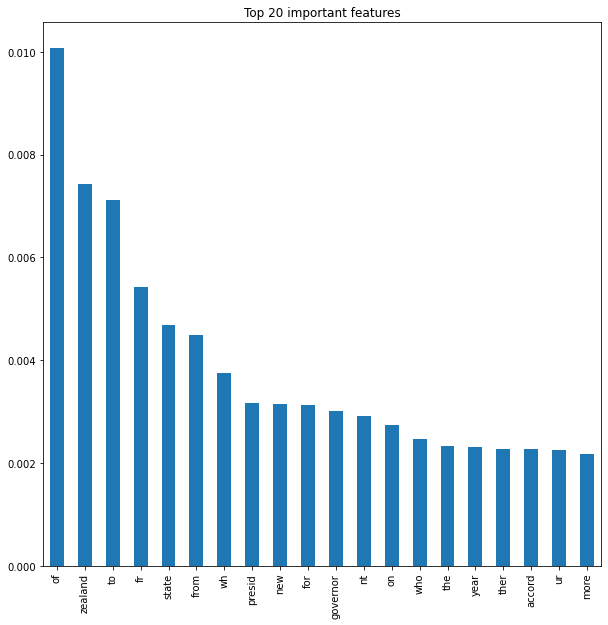

In [14]:
feat_importances = pd.Series(rf7.feature_importances_, index=vector7.get_feature_names())
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

## XGB

In [15]:
xgb_cl7 = xgb.XGBClassifier().fit(dev_X7,y_dev7)
#scores_xgb=cross_val_score(xgb_cl,dev_X,y_dev,cv=3)
#print("Auucuracy score on development data:",scores_xgb.mean())
print("Auucuracy score on test data:",xgb_cl7.score(test_X7,y_test7))
y_hat_xgb7 = xgb_cl7.predict(test_X7)
cm  = metrics.confusion_matrix(y_test7,y_hat_xgb7)
print(cm)
print(classification_report(y_test7,y_hat_xgb7, digits=4))

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Auucuracy score on test data: 0.9162178043286652
[[35900  3745]
 [ 3099 38944]]
              precision    recall  f1-score   support

           0     0.9205    0.9055    0.9130     39645
           1     0.9123    0.9263    0.9192     42043

    accuracy                         0.9162     81688
   macro avg     0.9164    0.9159    0.9161     81688
weighted avg     0.9163    0.9162    0.9162     81688



/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


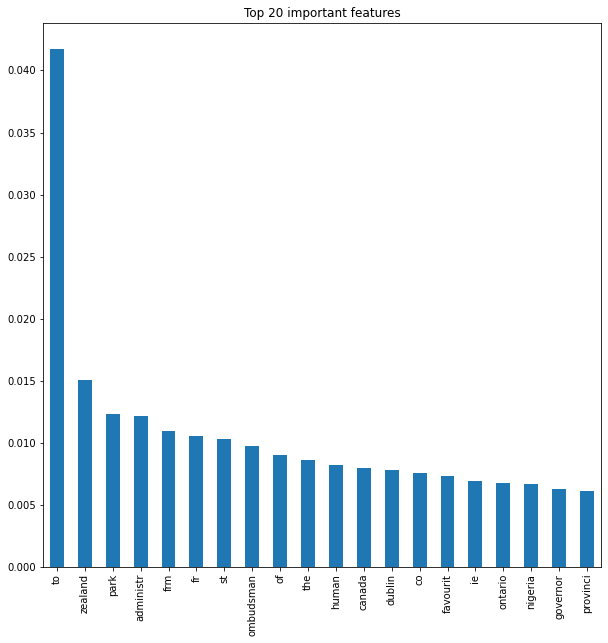

In [16]:
feat_importances = pd.Series(xgb_cl7.feature_importances_, index=vector7.get_feature_names())
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()